In [1]:
#import libraries
import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt 

## ignoring warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Import scikit_learn module 
from sklearn.model_selection import train_test_split

## import pytorch libraries
import torch
import torch.nn as nn

## Step 1: Data Preprocessing

In [2]:
df = pd.read_csv("income_dataset.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Shape of data

In [4]:
print("Shape of data is:\n",df.shape)
print("\n****************************************************\n")
print("Data Types in data:\n",df.info())
print("\n****************************************************\n")
print("Total null value count:\n",df.isna().sum())

Shape of data is:
 (32561, 15)

****************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Data Ty

### Creating the new dataset to where miscellaneous values are removed

#### there some missing value in the data in the form of "?". So I have replaced it with nan

In [5]:
#df = df.replace({'?': np.nan})
df_replace = df.replace({'?': np.nan})
print("total null value count",df_replace.isna().sum())
print("\n****************************************************\n")
df1 = df_replace.dropna()
print("Old Shape of data is:", df.shape,"\nNew Shape of data is:", df1.shape)

total null value count age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

****************************************************

Old Shape of data is: (32561, 15) 
New Shape of data is: (30162, 15)


There are two classes in income attribute we considered:
- ‘>50K’: minor class.
- ‘<=50K’: major class.

In [6]:
print(df1['income'].value_counts())
major,minor = df1['income'].value_counts()
print("\n****************************************************\n")
total = len(df1['income'])
print("majority population percentage is :",round((major/total )*100,2),"\nminority population percentage is :",round((minor/total )*100,2))

<=50K    22654
>50K      7508
Name: income, dtype: int64

****************************************************

majority population percentage is : 75.11 
minority population percentage is : 24.89


<AxesSubplot:ylabel='income'>

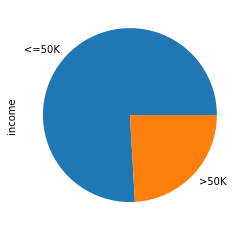

In [7]:
df['income'].value_counts().plot(kind='pie')

After checking the total precentage of each major and minor class i have found

- ‘>50K’: minor class, approximately 25%.
- ‘<=50K’: mazor class, approximately 75%.

this shows the data is imbalance in nature as most of the part is contributing to "<=50"

In [8]:
df1['income'] = np.where(df1['income'] == '<=50K',1,0)
df1['income'].value_counts()

1    22654
0     7508
Name: income, dtype: int64

#### There are categorical variable which needs to be convert into numerical 

In [9]:
from sklearn import preprocessing
def label_encode_val(val):
    label_encoder = preprocessing.LabelEncoder()
    value = label_encoder.fit_transform(val)
    return value

df1['workclass']= label_encode_val(df1['workclass'])
df1['marital.status']= label_encode_val(df1['marital.status'])
df1['occupation']= label_encode_val(df1['occupation'])
df1['relationship']= label_encode_val(df1['relationship'])
df1['race']= label_encode_val(df1['race'])
df1['sex']= label_encode_val(df1['sex'])
#df1['sex'].unique()

In [10]:
print("Data info after encoding:\n",df1.info())
print("\n****************************************************\n")
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  int32 
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  int32 
 6   occupation      30162 non-null  int32 
 7   relationship    30162 non-null  int32 
 8   race            30162 non-null  int32 
 9   sex             30162 non-null  int32 
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  int32 
dtypes: int32(7), int64(6), object(2)
memory usage: 2.9+ MB
Data info after encoding:
 None

**************************************************

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,HS-grad,9,6,3,1,4,0,0,4356,18,United-States,1
3,54,2,140359,7th-8th,4,0,6,4,4,0,0,3900,40,United-States,1
4,41,2,264663,Some-college,10,5,9,3,4,0,0,3900,40,United-States,1
5,34,2,216864,HS-grad,9,0,7,4,4,0,0,3770,45,United-States,1
6,38,2,150601,10th,6,5,0,4,4,1,0,3770,40,United-States,1


### Creating visuals on income distribution:

#### Country Wise

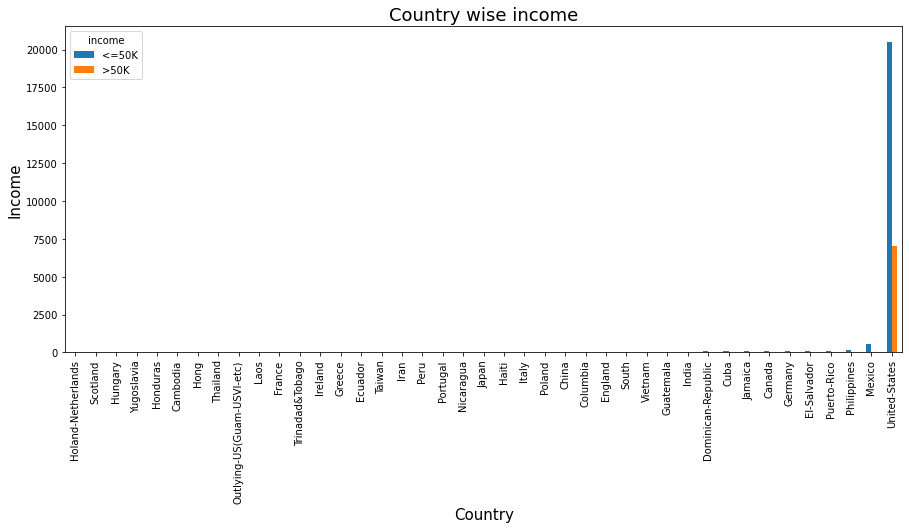

In [11]:
grouped_df = df.replace({'?': np.nan}).dropna()
country = grouped_df.groupby('native.country')['income'].value_counts().unstack().reset_index()
con_sorted= country.sort_values(['<=50K',">50K"])
# s = con_sorted.head(10)

# plt.figure(figsize=(6,10))
# make bar plot with matplotlib
# s.plot(x="native.country", y=["<=50K", ">50K"], kind="bar",figsize=(15,6))

con_sorted.plot(x="native.country", y=["<=50K", ">50K"], kind="bar",figsize=(15,6))

plt.xlabel("Country", size=15)
plt.ylabel("Income", size=15)
plt.title("Country wise income", size=18)

plt.show()

#### Work Class Wise

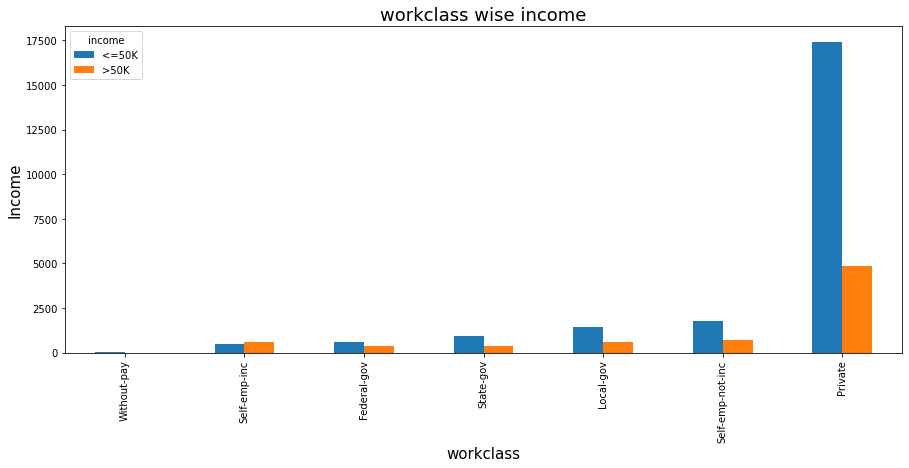

In [12]:
workclass = grouped_df.groupby('workclass')['income'].value_counts().unstack().reset_index()
work_sorted= workclass.sort_values(['<=50K',">50K"])

# workclass.head()

## plot
work_sorted.plot(x="workclass", y=["<=50K", ">50K"], kind="bar",figsize=(15,6))

plt.xlabel("workclass", size=15)
plt.ylabel("Income", size=15)
plt.title("workclass wise income", size=18)

plt.show()

#### Education wise

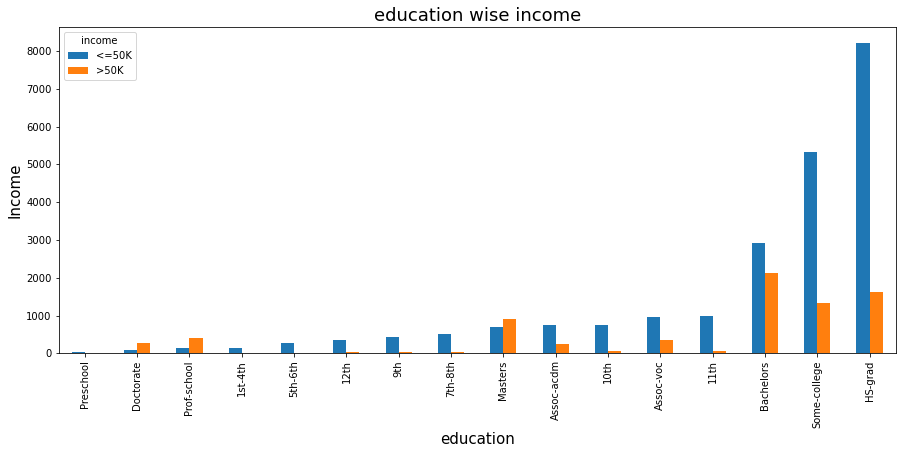

In [13]:
education = grouped_df.groupby('education')['income'].value_counts().unstack().reset_index()
education_sorted= education.sort_values(['<=50K',">50K"])
## plot
education_sorted.plot(x="education", y=["<=50K", ">50K"], kind="bar",figsize=(15,6))

plt.xlabel("education", size=15)
plt.ylabel("Income", size=15)
plt.title("education wise income", size=18)

plt.show()

#### Gender wise 

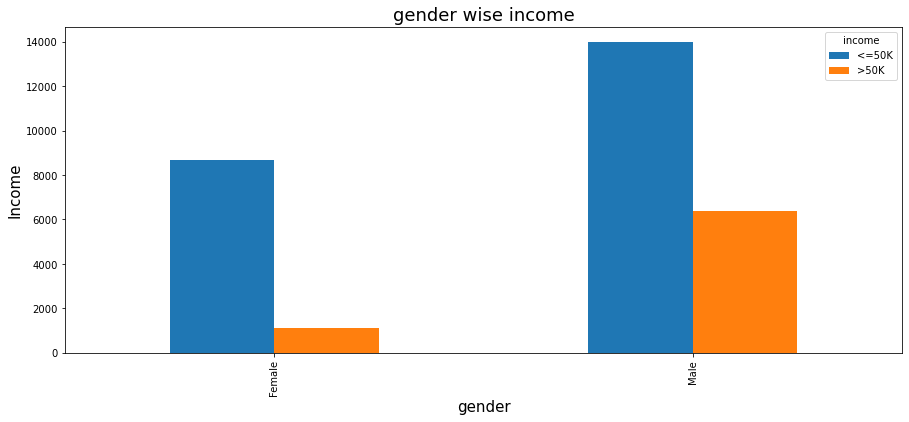

In [14]:
gender = grouped_df.groupby('sex')['income'].value_counts().unstack().reset_index()
gender_sorted= gender.sort_values(['<=50K',">50K"])
## plot
gender_sorted.plot(x="sex", y=["<=50K", ">50K"], kind="bar",figsize=(15,6))

plt.xlabel("gender", size=15)
plt.ylabel("Income", size=15)
plt.title("gender wise income", size=18)

plt.show()

In [15]:
print(" Statistical analysis of data:", df1.describe())

 Statistical analysis of data:                 age     workclass        fnlwgt  education.num  \
count  30162.000000  30162.000000  3.016200e+04   30162.000000   
mean      38.437902      2.199324  1.897938e+05      10.121312   
std       13.134665      0.953925  1.056530e+05       2.549995   
min       17.000000      0.000000  1.376900e+04       1.000000   
25%       28.000000      2.000000  1.176272e+05       9.000000   
50%       37.000000      2.000000  1.784250e+05      10.000000   
75%       47.000000      2.000000  2.376285e+05      13.000000   
max       90.000000      6.000000  1.484705e+06      16.000000   

       marital.status    occupation  relationship          race           sex  \
count    30162.000000  30162.000000  30162.000000  30162.000000  30162.000000   
mean         2.580134      5.959850      1.418341      3.678602      0.675685   
std          1.498016      4.029566      1.601338      0.834709      0.468126   
min          0.000000      0.000000      0.000000 

In [16]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### Normalize the dataset

In [17]:
data = df1.copy()

In [18]:
def normalise_data(value):
    min_val = min(value)
    max_val = max(value)
    norm_value = (value - min_val)/(max_val-min_val)
    return norm_value

data["age"] = normalise_data(data['age'])
data["education.num"] = normalise_data(data['education.num'])
data["capital.gain"] = normalise_data(data['capital.gain'])
data["capital.loss"] = normalise_data(data['capital.loss'])
data["hours.per.week"] = normalise_data(data['hours.per.week'])
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,2,132870,HS-grad,0.533333,6,3,1,4,0,0.0,1.000000,0.173469,United-States,1
3,0.506849,2,140359,7th-8th,0.200000,0,6,4,4,0,0.0,0.895317,0.397959,United-States,1
4,0.328767,2,264663,Some-college,0.600000,5,9,3,4,0,0.0,0.895317,0.397959,United-States,1
5,0.232877,2,216864,HS-grad,0.533333,0,7,4,4,0,0.0,0.865473,0.448980,United-States,1
6,0.287671,2,150601,10th,0.333333,5,0,4,4,1,0.0,0.865473,0.397959,United-States,1


### Imbalance Data

In [19]:
data['income'].value_counts()

1    22654
0     7508
Name: income, dtype: int64

In [20]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['income']==1)] 
df_minority = data[(data['income']==0)] 
# upsample minority class


In [21]:
print(df_majority.shape,df_minority.shape)

(22654, 15) (7508, 15)


In [22]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 22654, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<AxesSubplot:ylabel='income'>

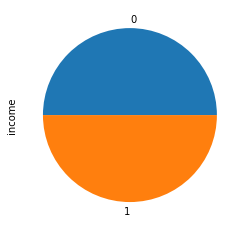

In [23]:
df_upsampled['income'].value_counts()
df_upsampled['income'].value_counts().plot(kind='pie')

## Setting X and y values for our traing and test set

In [24]:
# df1 = df_upsampled.copy()
df1 = data.copy()
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,2,132870,HS-grad,0.533333,6,3,1,4,0,0.0,1.000000,0.173469,United-States,1
3,0.506849,2,140359,7th-8th,0.200000,0,6,4,4,0,0.0,0.895317,0.397959,United-States,1
4,0.328767,2,264663,Some-college,0.600000,5,9,3,4,0,0.0,0.895317,0.397959,United-States,1
5,0.232877,2,216864,HS-grad,0.533333,0,7,4,4,0,0.0,0.865473,0.448980,United-States,1
6,0.287671,2,150601,10th,0.333333,5,0,4,4,1,0.0,0.865473,0.397959,United-States,1


In [25]:
y = df1['income'].values
X = df1.drop(['fnlwgt','education','native.country','income'],axis=1).values


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24129, 11) (6033, 11) (24129,) (6033,)


In [27]:
## Converting np.array to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Intialising the neural network model

In [45]:

class Model(nn.Module):
    ## Intializing hyperparameter
    def __init__(self, input_features, hidden_layer1, hidden_layer2, output_features):
        super(Model,self).__init__()
        ## Layer 1 for NN
        self.layer1 = nn.Linear(input_features,hidden_layer1) 
        
        ## Layer 2 for NN
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        
        ## Out layer for NN
        self.out_layer = nn.Linear(hidden_layer2, output_features)
        
        # Defining Activation Funtion to be used
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim = 1) 
        
    ## Intializing forward layer
    def forward(self, x):
        ## using Relu for first layer
        x = self.layer1(x)
        x = self.relu(x)
        
        ## using Relu for second layer
        x = self.layer2(x)
        x = self.relu(x)
        
         ## using softmax for output layer
        x = self.out_layer(x)
        x = self.softmax(x)

        return x

In [46]:
input_features_dim=11
hidden_layer1_dim=22
hidden_layer2_dim=34
output_features_dim=2

model = Model(input_features_dim, hidden_layer1_dim, hidden_layer2_dim, output_features_dim)

In [47]:
initializer = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
iter_val =100
train_loss_list = np.zeros((iter_val,))
train_accuracy_list = np.zeros((iter_val,))
test_loss_list = np.zeros((iter_val,))
test_accuracy_list = np.zeros((iter_val,))

In [48]:
for i in range(iter_val):
    ## passing X train value to forward layer of neural network
    y_pred_val = model.forward(X_train)
    ## Calculating cost
    cost = initializer(y_pred_val, y_train)
    train_loss_list[i] = cost.item()
    
    ##calling optimizer
    optimizer.zero_grad()
    ## updating weights using optimizer
    cost.backward()
    optimizer.step()
    ### added torch no grade function to predict the values for train data
    with torch.no_grad():
        pred_val = model.forward(X_train)
        correct_value = (torch.argmax(pred_val, dim=1) == y_train).type(torch.FloatTensor)
        train_accuracy_list[i] = correct_value.mean()
#         acc.append(accuracy_list)

print("Training Accuracy of our model is:", round(train_accuracy_list[99]*100,2),"%")

Training Accuracy of our model is: 84.03 %


In [49]:
print("Training Accuracy of our model is:", round(train_accuracy_list[99]*100,2),"%")

Training Accuracy of our model is: 84.03 %


In [50]:
for i in range(iter_val):
    y_pred = model.forward(X_test)
    loss = initializer(y_pred, y_test)
    test_loss_list[i] = loss.item()
#     losses.append(loss)
    #print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model.forward(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        test_accuracy_list[i] = correct.mean()

In [51]:
print("Test Accuracy of our model is:", round(test_accuracy_list[99]*100,2),"%")

Test Accuracy of our model is: 84.27 %


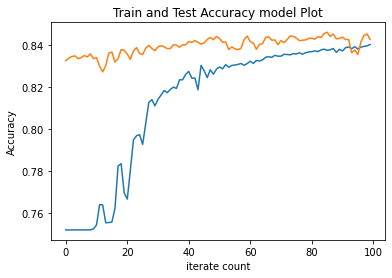

In [52]:
accuracy_list = list(zip (train_accuracy_list, test_accuracy_list))
# dataf = pd.DataFrame(accuracy_list, columns = ['train_Accuracy', 'test_Accuracy'])

import matplotlib.pyplot as plt
plt.plot(accuracy_list)
plt.title('Train and Test Accuracy model Plot')
plt.ylabel('Accuracy')
plt.xlabel('iterate count')
plt.show()

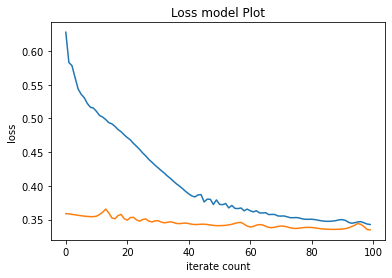

In [53]:
loss_list = list(zip (train_loss_list,test_loss_list))
# dataf = pd.DataFrame(accuracy_list, columns = ['train_Accuracy', 'test_Accuracy'])

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title('Loss model Plot')
plt.ylabel('loss')
plt.xlabel('iterate count')
plt.show()